# 2- RED NEURONAL QUE PUEDE LEER

Cuando es entrenado por primera vez, los resultados son erróneos con la predicción. Entonces debemos "enseñarle" que es lo que hizo mal a través de **La función de costo** con el objetivo de minizar esta función a través de la **Optimización**:
- Peso de las conexiones: define que tan fuerte es una conexión entre 2 neuronas
- Umbrales de las neuronas: Es el número que tiene cada neurona, lo utiliza para definir como funcionar

<hr> 

### Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### DataSet

In [2]:
#Obtenemos el set de datos y metadatos con la libreria mnist
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

In [27]:
#obtenemos los 100mil como entrenamiendo y 10mil como test
train_dataset, test_dataset = dataset['train'], dataset['test']

In [28]:
#Definimos etiquetas simples para cada posible respuesta
class_names = [
    'Cero','Uno','Dos','Tres','Cuatro','Cinco','Seis',
    'Siete','Ocho','Nueve'
]

#Obtenemos los ejemplos en variables para usarlos despues
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [29]:
# Normalizar: nº de 0 a 255, que sean de 0 a 1
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [30]:
# Llevamos la funcion de normalización en cada dato de ambos sets de datos 
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

### Estructura de la RedNeuronal

In [31]:
# Indicamos la capa de entrada con 784 neuronas de 28x28
# luego se agrega 2 capas ocultas densas con 64 neuronas cada una
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(3, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #softmax para clasificacion
])

- El optimizador: Controla cómo el modelo ajusta los pesos para minimizar el error
- La función de pérdida (o costo): Mide qué tan bien o mal el modelo está realizando las predicciones comparadas con las etiquetas reales.
- Las métricas: Permiten evaluar el desempeño del modelo durante y después del entrenamiento.

In [32]:
# compliar el modelo especificando la funcion de costo y el optimizador
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', #mide cuán lejos están las predicciones del modelo de las etiquetas reales
    metrics = ['accuracy'] #Evalúe el desempeño del modelo usando la métrica de precisión
)

In [33]:
# Preparar el set de datos
# Aprendizaje por lotes de 32 cada lote
BATCHSIZE = 32
#datos de entrenamiento de manera aleatoria
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

### Entrenamiento

In [34]:
# Realizar el aprendizaje
model.fit(
    train_dataset, epochs=5,
    steps_per_epoch = math.ceil(num_train_examples/BATCHSIZE)
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3976 - accuracy: 0.5239
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0116 - accuracy: 0.6798
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9375 - accuracy: 0.7057
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8969 - accuracy: 0.7196
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8817 - accuracy: 0.7297


### Evaluacion

In [35]:
# Evaluar el modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
	test_dataset, steps=math.ceil(num_test_examples/32)
)

print("Resultado en las pruebas: ", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.8678 - accuracy: 0.7366
Resultado en las pruebas:  0.7365999817848206


<hr>

### Visualización

In [36]:
for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
    #aplicamos el modelo para predecir
	predictions = model.predict(test_images)

1/1 [==============================] - 0s 69ms/step


In [37]:
def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

In [38]:
def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')

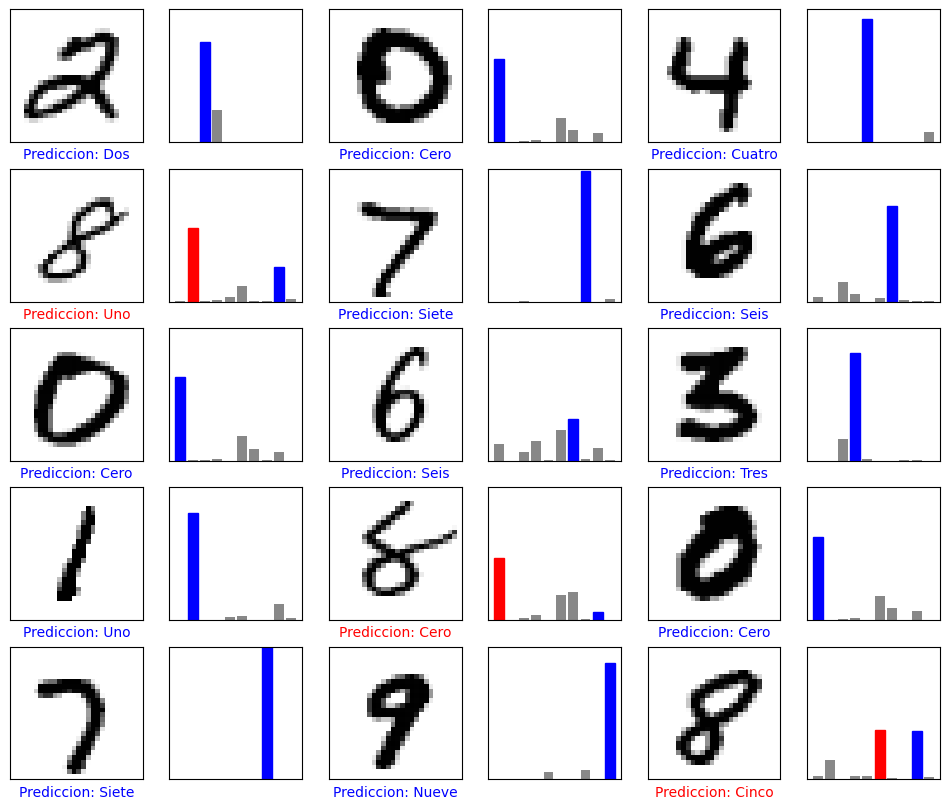

In [39]:
numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()

**En este caso tenemos 2 capas con 3 neuronas por lo que el resultado es peor, sin embargo con un mayor numero de neuroas podemos obtener mejores resultados**